In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits

digits = load_digits()

In [8]:
digits

{'DESCR': "Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels ar

In [9]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [10]:
import matplotlib.pyplot as plt

# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

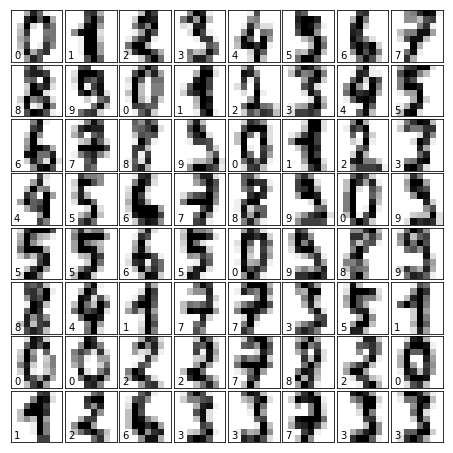

In [11]:
fig

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
digits.target.shape

# 1797 is the total number of character scans in the data set

(1797,)

In [15]:
digits.data[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [16]:
digits.data[1]

array([  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
        11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
         0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
         0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
        16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
         0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.])

In [17]:
digits.target[0]

0

In [18]:
digits.target[7]

7

In [19]:
### Model selection, training and prediction

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)
model = RandomForestClassifier(n_estimators=1000)

model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

In [21]:
## In Linear Regression, we use score and accuracy score for checking the efficiency of algorithm. 
## Similarly, here we import metrics and confusion matrix to check the efficiency

from sklearn import metrics
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.95      0.97        44
          2       0.95      1.00      0.98        42
          3       0.98      1.00      0.99        44
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.96      0.98      0.97        47
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



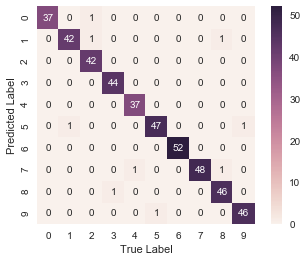

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
%matplotlib inline

mat = confusion_matrix(ytest,ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar='False')
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

## Heatmap is used to analyze the prediction with respect to actual data

In [34]:
print(metrics.classification_report(ypred, ytest))

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.95      0.97        44
          2       0.95      1.00      0.98        42
          3       0.98      1.00      0.99        44
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.96      0.98      0.97        47
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



## In the above table, precision is the percentage of accurate prediction for the respective numbers mentioned in the index. 

## Recall is the percentage error in calculating eg : in the 1st row - Index - 0 , 2 is wrongly predicted as 0